In [129]:
import numpy as np
import matplotlib.pyplot as plt

In [130]:
def Relajar(V,nx,ny):
    for i in range(1,nx-1):
        for j in range(1,ny-1):

            V[i,j]= (V[i+1,j] + V[i-1,j] + V[i,j+1] + V[i,j-1] )/4.0

In [137]:
##  TAMAÑO DE LA GRILLA
Nx, Ny = 100,50

## AHORA LA GRILLA CON LAS CONDICIONES DE CONTORNO
## ESTA MATRIZ REPRESENA EL EL POTENCIAL EN TODO EL ESPACIO, POR ESO INCLUYE YA LAS
## CONDICIONES DE CONTORNO

v0 = 220
V = np.zeros((Nx,Ny))

V[20:31,0] =   -v0    ## VOLTIOS
V[70:81,0] =   v0
V[20:31,-1] =  -v0   ## VOLTIOS
V[70:81,-1] =  v0

for i in range(Ny):
    V[0,i] = -v0
    V[-1,i] = v0

V[0].size

50

In [138]:
## ENTONCES AHORA ITERAMOS SOBRE LA GRILLA V Y ACTUALIZAMOS EL VALOR DEL POTENCIAL
iteraciones = 100
for i in range(iteraciones):
    Relajar(V,Nx,Ny)

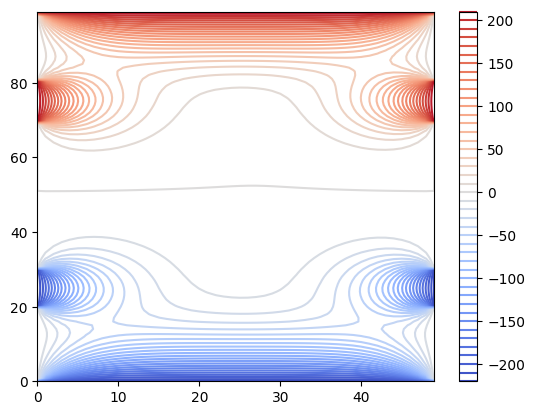

In [143]:
V_eq = np.arange(-v0,v0, 10)

plt.contour(V, V_eq, cmap="coolwarm", vmin = -v0, vmax=v0)
#plt.imshow(V)
plt.title = " Equipotenciales"
plt.colorbar()
plt.show()


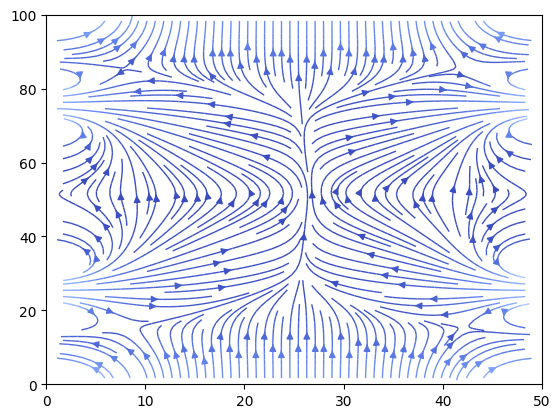

In [144]:
## AHORA TRATAREMOS DE GRAFICAR EL CAMPO ELECTRICO
Ex = ( V[1:-1,2:]- V[1:-1, :-2] )/2
Ey = ( V[2:,1:-1] - V[:-2,1:-1] )/2

Ex = np.pad(Ex, ((1, 1), (1, 1)), mode='constant', constant_values=np.nan)
Ey = np.pad(Ey, ((1, 1), (1, 1)), mode='constant', constant_values=np.nan)

E = np.sqrt(Ex**2 + Ey**2)

x = np.linspace(0,50,50)
y = np.linspace(0,100,100)
X,Y = np.meshgrid(x,y)

E.shape
X.shape
plt.streamplot(X,Y,Ex,Ey,density=2,color=E,cmap='coolwarm', linewidth=1)
#plt.colorbar()